# **DOMAIN´S CLUSTERING**

- In this notebook I´m going to try and test different clustering models, preprocessing the data in different ways to compare and coose the best results, that is, to find different clusters with similar charasteristics or properties, with the objective of make the advertiser decision of where are the optimal domains to invest easier

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import seaborn as sns
import pickle
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import silhouette_samples, silhouette_score

pd.options.display.float_format = '{:.2f}'.format #So the numbers will not appear in a scientific format


In [4]:
groupby_domains = pd.read_csv('Global groupby_domains.csv')

I´m gonna test the clustering over two different data transformations :

- **Standarizing the data with Standard Scaler**
- **Scaling features using statistics that are robust to outliers with Robust Scaler**

****In order to get a better clustering performance, I´m gonna drop the following columns :****

- **Domain:** it´s a string and doesn´t add nothing to the model
- **Category:** I could convert the Categories into numbers, but this can strongly affect to the model, and the categories are also represented in the Category importance columns
- **Viewability Rate, Efficiency Rate:** these columns are important to the advertisers (that´s the reason I didn´t drop them in the first place) but both of them have really high percentages so they are not useful to find differences between the domains

In [5]:
groupby_domains_clustering = groupby_domains.drop(['Domain','Category', 'Viewability Rate', 'Efficiency Rate'], 1)

groupby_domains_StandardScaler = StandardScaler().fit_transform(groupby_domains_clustering)
groupby_domains_RobustScaler = RobustScaler().fit_transform(groupby_domains_clustering)

In [6]:
pd.DataFrame(groupby_domains_StandardScaler).describe() 

,0,1,2,3,4,5,6,7,8
count,818.00,818.00,818.00,818.00,818.00,818.00,818.00,818.00,818.00
mean,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.56,-0.59,-0.84,-6.81,-0.51,-1.30,-6.30,-1.24,-0.72
25%,-0.46,-0.49,-0.66,-0.40,-0.44,-0.69,-0.39,-1.07,-0.72
50%,-0.33,-0.29,-0.30,-0.09,-0.28,-0.13,0.19,0.92,-0.72
75%,0.03,0.10,0.28,0.29,0.09,0.46,0.61,0.92,0.29
max,12.37,10.92,7.49,7.51,17.32,7.55,2.35,0.92,2.31


In [7]:
pd.DataFrame(groupby_domains_RobustScaler).describe()

,0,1,2,3,4,5,6,7,8
count,818.00,818.00,818.00,818.00,818.00,818.00,818.00,818.00,818.00
mean,0.67,0.49,0.32,0.13,0.51,0.12,-0.19,-0.46,0.72
std,2.04,1.71,1.06,1.45,1.87,0.87,1.01,0.50,0.99
min,-0.47,-0.50,-0.57,-9.76,-0.43,-1.01,-6.52,-1.09,0.00
25%,-0.26,-0.34,-0.38,-0.44,-0.31,-0.49,-0.58,-1.00,0.00
50%,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.74,0.66,0.62,0.56,0.69,0.51,0.42,0.00,1.00
max,25.87,19.10,8.29,11.04,32.82,6.69,2.17,0.00,3.00


## Applying GRIDSEARCHCV to find the best parameters for KMEANS ALGORITHM

- ### With he Standard Scaler transformation:

In [8]:
kmeans = KMeans()
parameters = {'n_clusters':range(1,15),
              'init' : ('k-means++', 'random'), 
              'n_init':[5,10,15,20,25],
              'max_iter' : [50,100,200,300,400,500,700,1000],
              'algorithm' : ('auto', 'full', 'elkan')}

gridsearchcv_standardscaler = GridSearchCV(estimator = kmeans, param_grid = parameters)

In [10]:
%%time
gridsearchcv_standardscaler.fit(groupby_domains_StandardScaler)

Wall time: 42min 47s


GridSearchCV(cv=None, error_score=nan,
             estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++',
                              max_iter=300, n_clusters=8, n_init=10,
                              n_jobs=None, precompute_distances='auto',
                              random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ('auto', 'full', 'elkan'),
                         'init': ('k-means++', 'random'),
                         'max_iter': [50, 100, 200, 300, 400, 500, 700, 1000],
                         'n_clusters': range(1, 15),
                         'n_init': [5, 10, 15, 20, 25]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [12]:
#Saving the results in a DataFrame
gridsearch_results_SS = pd.DataFrame(gridsearchcv_standardscaler.cv_results_).sort_values(by='rank_test_score')
gridsearch_results_SS.to_csv('GridSearch Standard Scaler Results.csv')
gridsearch_results_SS.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_init,param_max_iter,param_n_clusters,param_n_init,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3145,0.04,0.00,0.00,0.00,elkan,random,400,14,5,"{'algorithm': 'elkan', 'init': 'random', 'max_...",-1817.66,-527.36,-547.53,-402.67,-441.44,-747.33,537.82,1
1815,0.08,0.01,0.00,0.00,full,random,100,14,5,"{'algorithm': 'full', 'init': 'random', 'max_i...",-2077.53,-493.75,-527.52,-408.41,-485.67,-798.58,640.67,2
3146,0.10,0.00,0.00,0.00,elkan,random,400,14,10,"{'algorithm': 'elkan', 'init': 'random', 'max_...",-2102.65,-454.43,-534.86,-390.99,-510.29,-798.64,653.88,3


In [13]:
# save the model to disk
filename = 'gridsearchmodel_standardscaler.sav'
pickle.dump(gridsearchcv_standardscaler, open(filename, 'wb'))

In [14]:
# load the model from disk
filename = 'gridsearchmodel_standardscaler.sav'
gridsearchmodel_standardscaler = pickle.load(open(filename, 'rb'))


In [15]:
gridsearchmodel_standardscaler.best_estimator_

KMeans(algorithm='elkan', copy_x=True, init='random', max_iter=400,
       n_clusters=14, n_init=5, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

- ### With he Robust Scaler transformation:

In [16]:
kmeans = KMeans()
parameters = {'n_clusters':range(1,17),
              'init' : ('k-means++', 'random'), 
              'n_init':[5,10,15,20,25],
              'max_iter' : [50,100,200,300,400,700,1000],
              'algorithm' : ('auto', 'full', 'elkan')}

gridsearchcv_robustscaler = GridSearchCV(estimator = kmeans, param_grid = parameters)

In [17]:
%%time
gridsearchcv_robustscaler.fit(groupby_domains_RobustScaler)

Wall time: 51min 34s


GridSearchCV(cv=None, error_score=nan,
             estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++',
                              max_iter=300, n_clusters=8, n_init=10,
                              n_jobs=None, precompute_distances='auto',
                              random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ('auto', 'full', 'elkan'),
                         'init': ('k-means++', 'random'),
                         'max_iter': [50, 100, 200, 300, 400, 700, 1000],
                         'n_clusters': range(1, 17),
                         'n_init': [5, 10, 15, 20, 25]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [19]:
#Saving the results in a DataFrame
gridsearch_results_RS = pd.DataFrame(gridsearchcv_robustscaler.cv_results_).sort_values(by='rank_test_score')
gridsearch_results_RS.to_csv('GridSearch Results with Robust Scaler.csv')
gridsearch_results_RS.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_init,param_max_iter,param_n_clusters,param_n_init,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3356,0.12,0.02,0.00,0.00,elkan,random,1000,16,10,"{'algorithm': 'elkan', 'init': 'random', 'max_...",-5372.63,-686.85,-633.02,-462.59,-555.98,-1542.21,1916.70,1
2956,0.19,0.02,0.00,0.00,elkan,random,100,16,10,"{'algorithm': 'elkan', 'init': 'random', 'max_...",-5341.84,-697.44,-665.97,-512.00,-543.19,-1552.09,1896.18,2
1039,0.38,0.04,0.00,0.00,auto,random,700,16,25,"{'algorithm': 'auto', 'init': 'random', 'max_i...",-5346.14,-675.65,-684.13,-519.91,-557.82,-1556.73,1895.79,3


In [20]:
# save the model to disk
filename = 'gridsearchmodel_robustscaler.sav'
pickle.dump(gridsearchcv_robustscaler, open(filename, 'wb'))

In [21]:
# load the model from disk
filename = 'gridsearchmodel_robustscaler.sav'
gridsearchmodel_robustscaler = pickle.load(open(filename, 'rb'))


In [22]:
gridsearchmodel_robustscaler.best_estimator_

KMeans(algorithm='elkan', copy_x=True, init='random', max_iter=1000,
       n_clusters=16, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## ELBOW METHOD to visually check the ideal number of clusters 

- ### With he Standard Scaler transformation:

In [23]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=400, n_init=5, algorithm='elkan')
    kmeans.fit(groupby_domains_StandardScaler)
    wcss.append(kmeans.inertia_)


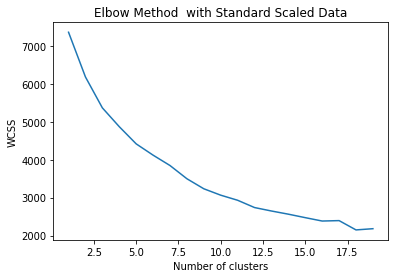

In [25]:
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method  with Standard Scaled Data')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

- ### With he Robust Scaler transformation:

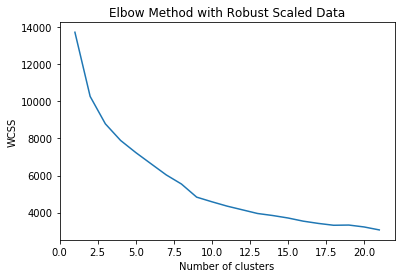

In [26]:
wcss = []
for i in range(1, 22):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=1000, n_init=10, algorithm='elkan')
    kmeans.fit(groupby_domains_RobustScaler)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 22), wcss)
plt.title('Elbow Method with Robust Scaled Data')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

- **My first impression is that, in order to make the advertiser decision easier, and be able to detect a specific cluster attending to its preferences, the number of clusters should not be more than 10**

- **The GridSearchCV best result for n_clusters is the maximum I defined (14 in the first case, and 16 in the second case). But attending to the Elbow Method I´m gonna train the Kmeans Model with 9 clusters**

## Training the KMEANS model

- ### With the optimal parameters for Standard Scaled Data, based on the GridSearchCV results

In [27]:
kmeans_StandardScaler = KMeans(n_clusters=9, init='random', max_iter=400, n_init=5, algorithm='elkan')
kmeans_StandardScaler.fit(groupby_domains_StandardScaler)


KMeans(algorithm='elkan', copy_x=True, init='random', max_iter=400,
       n_clusters=9, n_init=5, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [37]:
pd.DataFrame(kmeans_StandardScaler.labels_)[0].value_counts()

8    230
2    218
6    166
5     62
7     59
4     29
3     26
0     19
1      9
Name: 0, dtype: int64

- ### With the optimal parameters for Robust Scaled Data, based on the GridSearchCV results

In [41]:
kmeans_RobustScaler = KMeans(n_clusters=9, init='random', max_iter=1000, n_init=10, algorithm='elkan')
kmeans_RobustScaler.fit(groupby_domains_RobustScaler)


KMeans(algorithm='elkan', copy_x=True, init='random', max_iter=1000,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [42]:
pd.DataFrame(kmeans_RobustScaler.labels_)[0].value_counts()

8    321
2    175
1    130
4     89
3     50
0     27
7     13
6     10
5      3
Name: 0, dtype: int64

- ### Plotting the clusters in each case:

In [43]:
def plot_clustering(data, clusters, centroids = []):
    
    K_ = len(set(clusters))
    
    plt.figure(figsize=(8,4))
    plt.scatter(data[:,0], data[:,1],
                c=clusters, cmap="plasma", linewidths=0)

    if centroids != []:
        for k in range(K_):
            plt.scatter(centroids[k,0], centroids[k, 1], s=100, marker='D', color='red')
        
    plt.show()


C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if __name__ == '__main__':


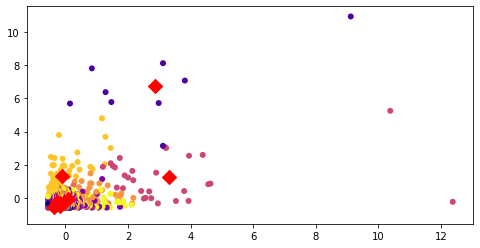

In [44]:
centroids_sk = kmeans_StandardScaler.cluster_centers_
clusters_sk = kmeans_StandardScaler.predict(groupby_domains_StandardScaler)
plot_clustering(groupby_domains_StandardScaler, clusters_sk, centroids_sk)

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if __name__ == '__main__':


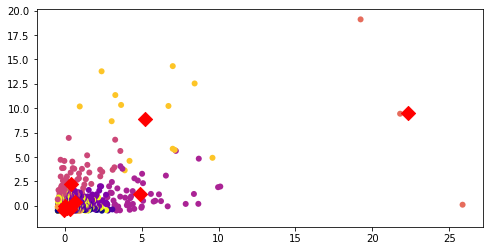

In [45]:
centroids_sk = kmeans_RobustScaler.cluster_centers_
clusters_sk = kmeans_RobustScaler.predict(groupby_domains_RobustScaler)
plot_clustering(groupby_domains_RobustScaler, clusters_sk, centroids_sk)

### SILHOUETTE ANALYSIS

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

For n_clusters = 2 The average silhouette_score is : 0.6497486820508691
For n_clusters = 3 The average silhouette_score is : 0.307059169147315
For n_clusters = 4 The average silhouette_score is : 0.2943169546990309
For n_clusters = 5 The average silhouette_score is : 0.27254035969929724
For n_clusters = 6 The average silhouette_score is : 0.2868183884766386
For n_clusters = 8 The average silhouette_score is : 0.24161790654347365
For n_clusters = 10 The average silhouette_score is : 0.2233412648610399
For n_clusters = 12 The average silhouette_score is : 0.16881515444844963
For n_clusters = 14 The average silhouette_score is : 0.18874004101672462
For n_clusters = 16 The average silhouette_score is : 0.17034914437568577


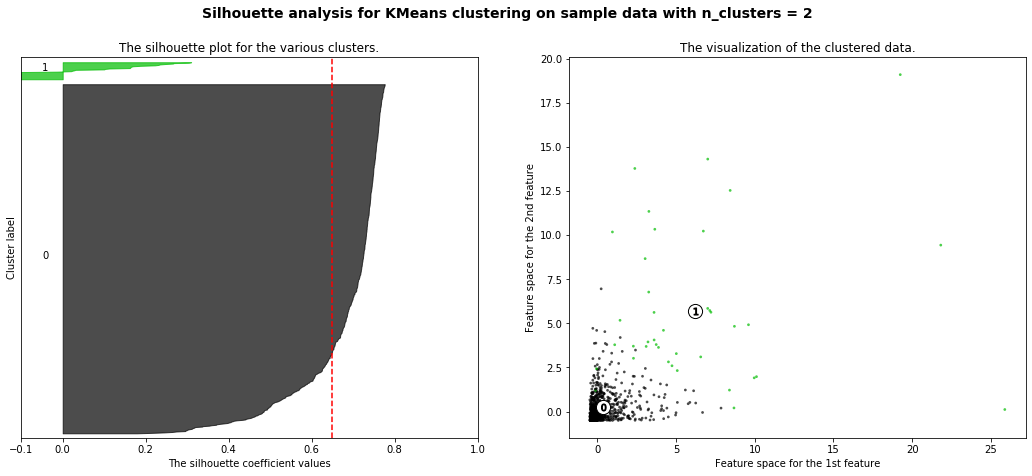

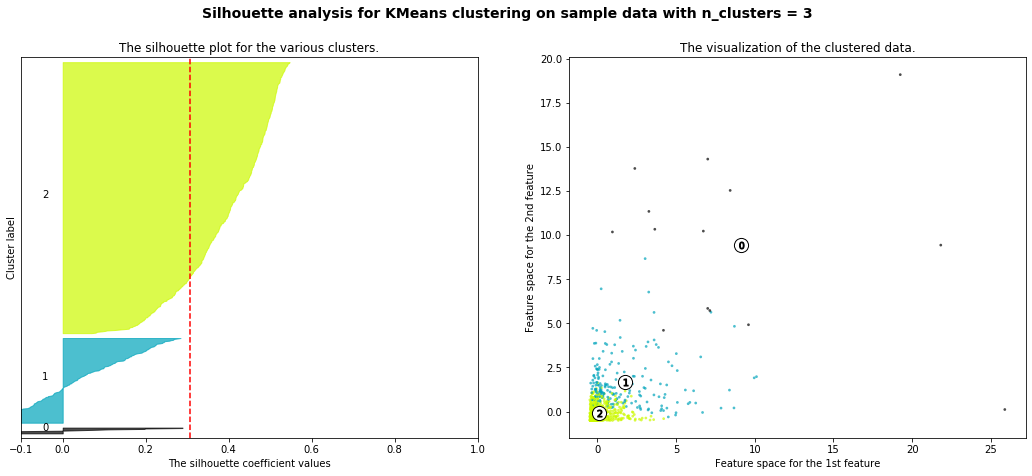

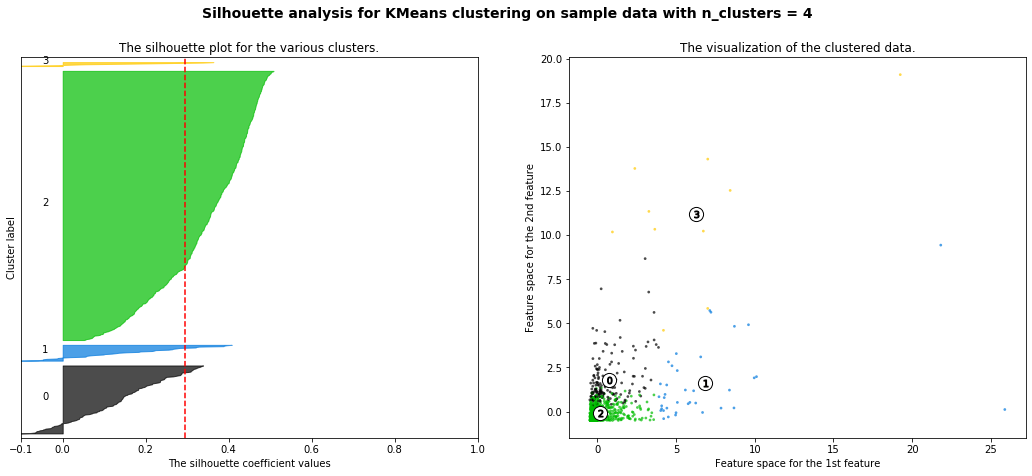

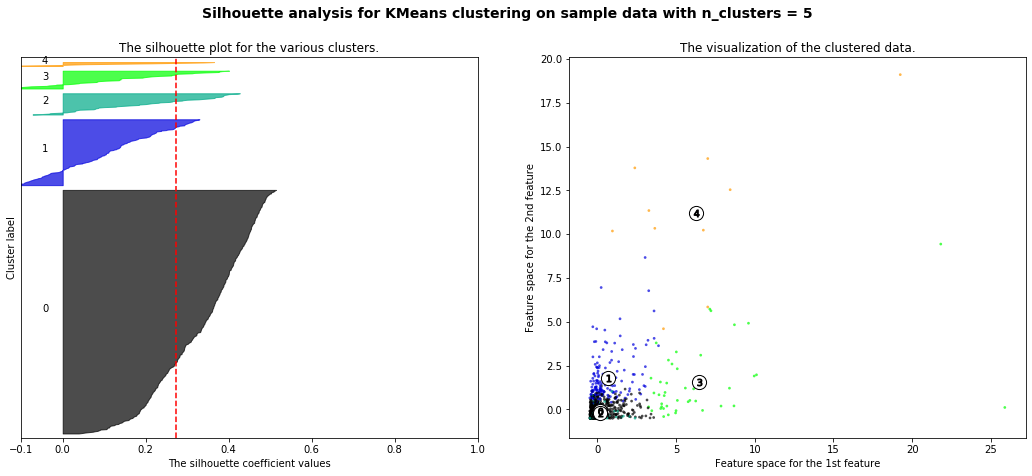

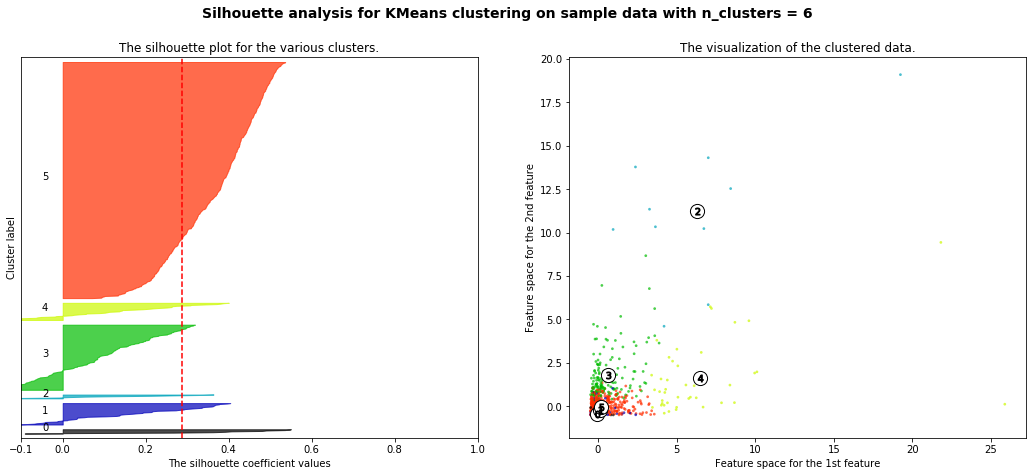

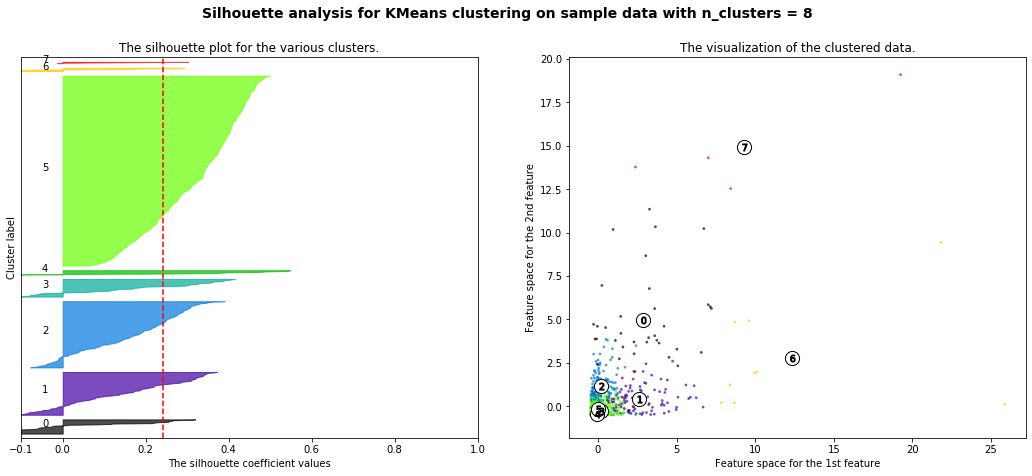

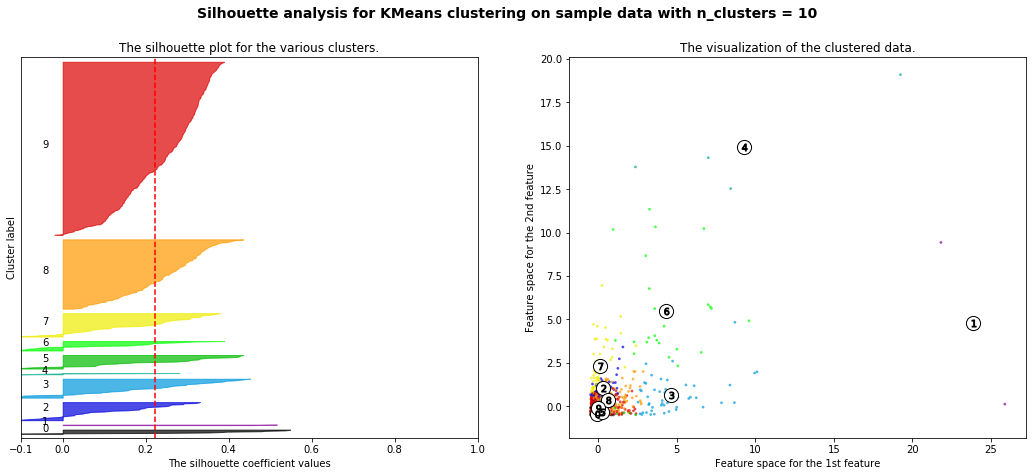

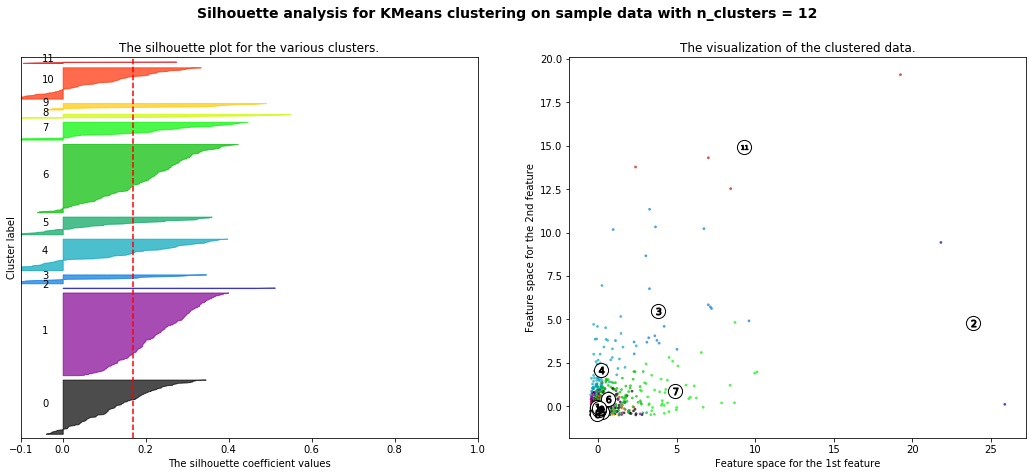

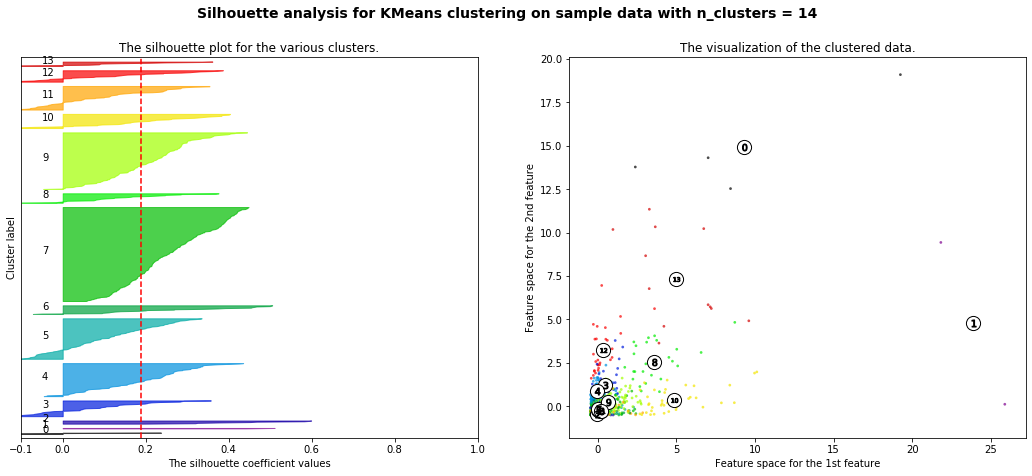

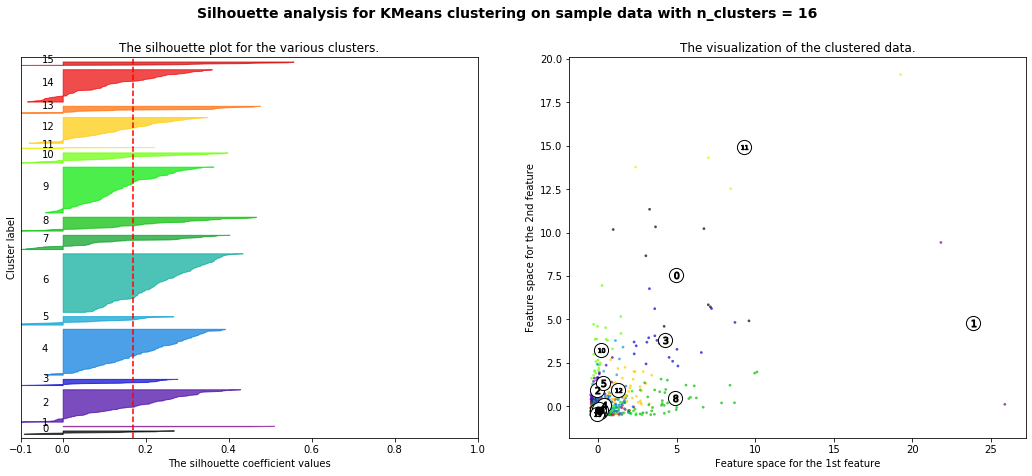

In [32]:
range_n_clusters = [2, 3, 4, 5, 6, 8, 10, 12, 14, 16]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(groupby_domains_RobustScaler) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, init='random', max_iter=1000, n_init=10, algorithm='elkan')
    cluster_labels = clusterer.fit_predict(groupby_domains_RobustScaler)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(groupby_domains_RobustScaler, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(groupby_domains_RobustScaler, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(groupby_domains_RobustScaler[:, 0], groupby_domains_RobustScaler[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## **FIRST CONCLUSSIONS**:

KMEANS algorithm doesn´t seem to be a good choice to make clusters, at least with the actual data

We can see in the graph and in the silhouette score than the distances between clusters are really small and there are not distinguishable clusters, so we can´t clear up the separation of the domains

Some clusters have only a few Domains. Ouliers is clearly a problem in this dataset and Kmeans algorithm is really sensitive to this ouliers, although I´ve applied the Robust Scaler transformation, which minimizes the impact of the outliers 

**Because of this, I´m gonna try other clustering methods:**

## HIERARCHICAL CLUSTERING

In [57]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics.pairwise import manhattan_distances


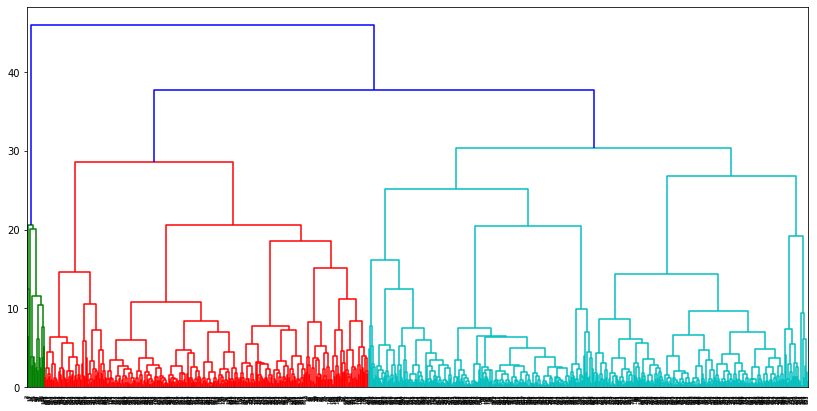

In [65]:
Z = linkage(groupby_domains_StandardScaler, 'ward') #'single', 'ward', ...
plt.figure(figsize=(14, 7))
dendrogram(Z)
plt.show()

In [67]:
from scipy.cluster.hierarchy import fcluster
cut_distance = 20
clusters_hc = fcluster(Z, t = cut_distance, criterion='distance')
np.unique(clusters_hc, return_counts = True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32),
 array([  3,  15,   1,  64, 140, 135,  87, 124,  24, 200,  25], dtype=int64))

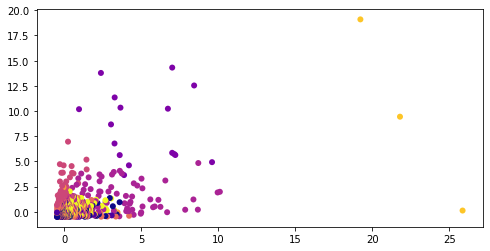

In [75]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=9)  

# fit data and predict 
clusters = cluster.fit_predict(groupby_domains_StandardScaler)

plot_clustering(groupby_domains_RobustScaler, clusters)

## DBSCAN

- First, I´m going to find the optimal value of eps, the value for which two points are considered neighbors if the distance between the two points is below the threshold epsilon.

We can calculate the distance from each point to its closest neighbour using the NearestNeighbors. The point itself is included in n_neighbors. The kneighbors method returns two arrays, one which contains the distance to the closest n_neighbors points and the other which contains the index for each of those points.

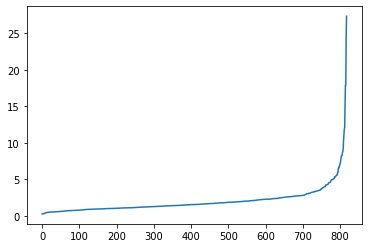

In [79]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(p=1)
nbrs = neigh.fit(groupby_domains_RobustScaler)
distances, indices = nbrs.kneighbors(groupby_domains_RobustScaler)

#Next, I sort and plot results.
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [84]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=5, min_samples=25)
dbs = dbs.fit(groupby_domains_RobustScaler)

id_clusters = np.unique(dbs.labels_)
print('Found {} clusters'.format(len(id_clusters)))
np.unique(dbs.labels_, return_counts=True)

Found 2 clusters


(array([-1,  0], dtype=int64), array([ 17, 801], dtype=int64))

In [74]:
dbs = DBSCAN(eps=3, min_samples=5)
dbs = dbs.fit(groupby_domains_RobustScaler)

id_clusters = np.unique(dbs.labels_)
print('Found {} clusters'.format(len(id_clusters)))
np.unique(dbs.labels_, return_counts=True)

Found 2 clusters


(array([-1,  0], dtype=int64), array([ 61, 757], dtype=int64))

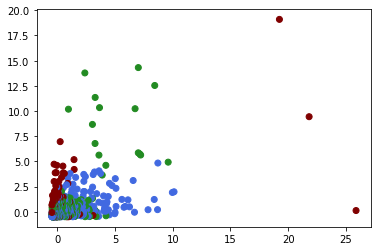

In [85]:
colors = ['royalblue', 'maroon', 'forestgreen']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

plt.scatter(groupby_domains_RobustScaler[:,0], groupby_domains_RobustScaler[:,1], c=vectorizer(clusters))


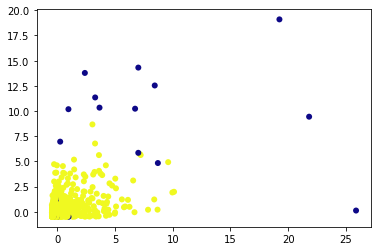

In [86]:
plt.scatter(groupby_domains_RobustScaler[:,0], groupby_domains_RobustScaler[:,1], c=dbs.labels_, cmap="plasma", linewidths=0);

### PCA + KMEANS

In [88]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(groupby_domains_RobustScaler)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [89]:
pca.explained_variance_ratio_

array([0.45105266, 0.18194262, 0.12982704, 0.07434757, 0.05545923,
       0.04837514, 0.03058476, 0.01477572, 0.01363526])

Text(0, 0.5, 'Cumulative explained variance')

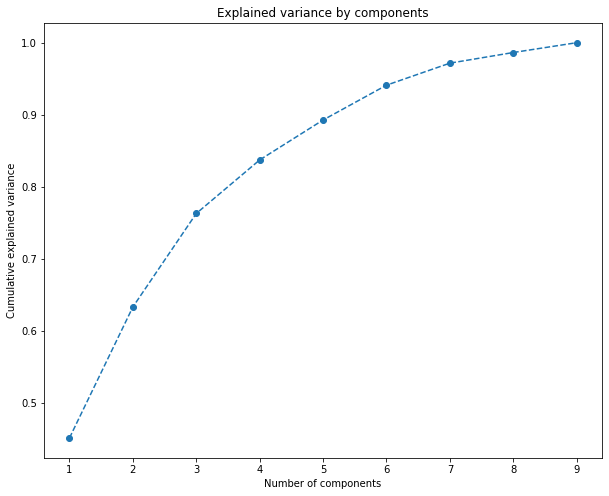

In [94]:
plt.figure(figsize=(10,8))
plt.plot(range(1,10), pca.explained_variance_ratio_.cumsum(), marker= 'o' , linestyle = '--')
plt.title('Explained variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

 A rule of thumb is to preserve around 80 % of the variance. So, in this instance, I decide to keep 5 components and preserve 90% of the variance. So I perform PCA with the chosen number of components.

In [95]:
pca = PCA(n_components=5)
pca.fit(groupby_domains_RobustScaler)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [96]:
scores_pca = pca.transform(groupby_domains_RobustScaler)

In [97]:
wcss = []
for i in range(1, 22):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=100, n_init=20, algorithm='elkan')
    kmeans.fit(scores_pca)
    wcss.append(kmeans.inertia_)


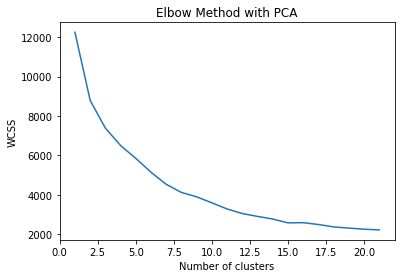

In [98]:
plt.plot(range(1, 22), wcss)
plt.title('Elbow Method with PCA')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [106]:
kmeans_pca = KMeans(n_clusters=12, init='random', max_iter=1000, n_init=10, algorithm='elkan')
kmeans_pca.fit(scores_pca)

KMeans(algorithm='elkan', copy_x=True, init='random', max_iter=1000,
       n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [107]:
pd.DataFrame(kmeans_pca.labels_)[0].value_counts()

3     222
2     186
0     146
10     63
6      55
9      41
1      40
5      27
7      22
8      10
11      3
4       3
Name: 0, dtype: int64

### DBSCAN + PCA

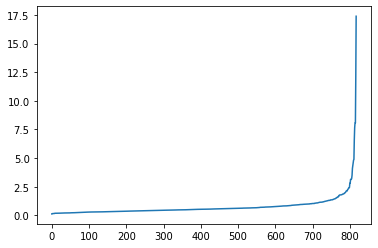

In [108]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(scores_pca)
distances, indices = nbrs.kneighbors(scores_pca)

#Next, I sort and plot results.
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [113]:
dbs = DBSCAN(eps=2, min_samples=5)
dbs = dbs.fit(scores_pca)

id_clusters = np.unique(dbs.labels_)
print('Found {} clusters'.format(len(id_clusters)))
np.unique(dbs.labels_, return_counts=True)

Found 2 clusters


(array([-1,  0], dtype=int64), array([133, 685], dtype=int64))

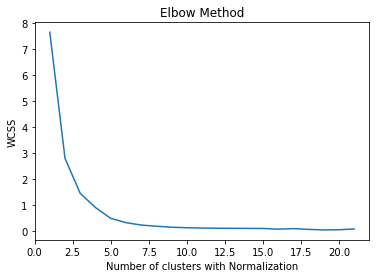

In [114]:
from sklearn.preprocessing import normalize
groupby_domains_normalized = normalize(groupby_domains_clustering)
wcss = []
for i in range(1, 22):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, n_init=10, algorithm='auto')
    kmeans.fit(groupby_domains_normalized)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 22), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters with Normalization')
plt.ylabel('WCSS')
plt.show()

In [115]:
kmeans_normalized = KMeans(n_clusters=5, init='random', max_iter=1000, n_init=10, algorithm='elkan')
kmeans_normalized.fit(groupby_domains_normalized)


KMeans(algorithm='elkan', copy_x=True, init='random', max_iter=1000,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [117]:
pd.DataFrame(kmeans_normalized.labels_)[0].value_counts()

4    376
1    256
3    118
0     60
2      8
Name: 0, dtype: int64

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if __name__ == '__main__':


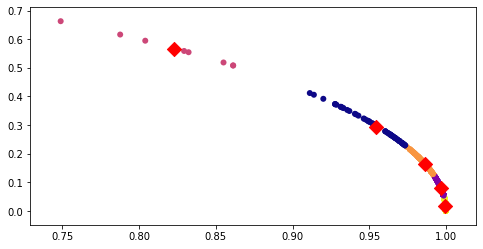

In [118]:
centroids_sk = kmeans_normalized.cluster_centers_
clusters_sk = kmeans_normalized.predict(groupby_domains_normalized)
plot_clustering(groupby_domains_normalized, clusters_sk, centroids_sk)

### K-MEDOIDS

In [122]:
%run KMEDOIDS.py

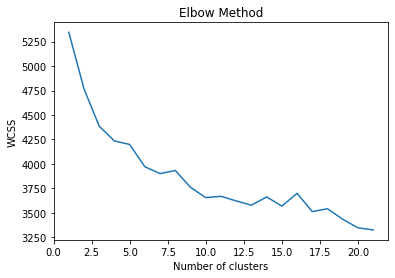

In [137]:
wcss = []
for i in range(1, 22):
    kmedoids = KMedoids(n_clusters = i, metric='manhattan')
    kmedoids.fit(groupby_domains_RobustScaler)
    wcss.append(kmedoids.inertia_)
plt.plot(range(1, 22), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [132]:
kmedoids = KMedoids(n_clusters = 10, metric='manhattan')
kmedoids.fit(groupby_domains_RobustScaler)

KMedoids(init='heuristic', max_iter=300, metric='manhattan', n_clusters=10,
         random_state=None)

In [133]:
pd.DataFrame(kmedoids.labels_)[0].value_counts()

7    121
2    118
1     82
4     81
5     77
0     77
8     75
9     70
3     66
6     51
Name: 0, dtype: int64

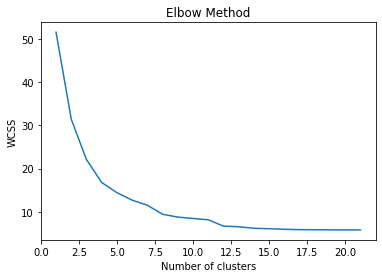

In [139]:
wcss = []
for i in range(1, 22):
    kmedoids = KMedoids(n_clusters = i)
    kmedoids.fit(groupby_domains_normalized)
    wcss.append(kmedoids.inertia_)
plt.plot(range(1, 22), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [141]:
kmedoids = KMedoids(n_clusters = 8)
kmedoids.fit(groupby_domains_normalized)

KMedoids(init='heuristic', max_iter=300, metric='euclidean', n_clusters=8,
         random_state=None)

In [142]:
pd.DataFrame(kmedoids.labels_)[0].value_counts()

0    142
2    141
6    135
1    121
4     95
3     80
7     70
5     34
Name: 0, dtype: int64